**PoliceKillingUS DATA ANALYSIS**
 ***
***WITH PANDAS AND MATPLOTLIB***

In [48]:
# Basic Libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

# matplotlib grafiklerimizin boyutları için ön ayar!!!!!!!
plt.figure(figsize=(15,7))

# Libraries for Visualisation
import scipy
import seaborn as sns

# seaborn grafiklerimizin boyutları için ön ayar!!!!!!!
sns.set(rc={'figure.figsize':(12,8)})

from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

<Figure size 1080x504 with 0 Axes>

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

In [49]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [50]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [51]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

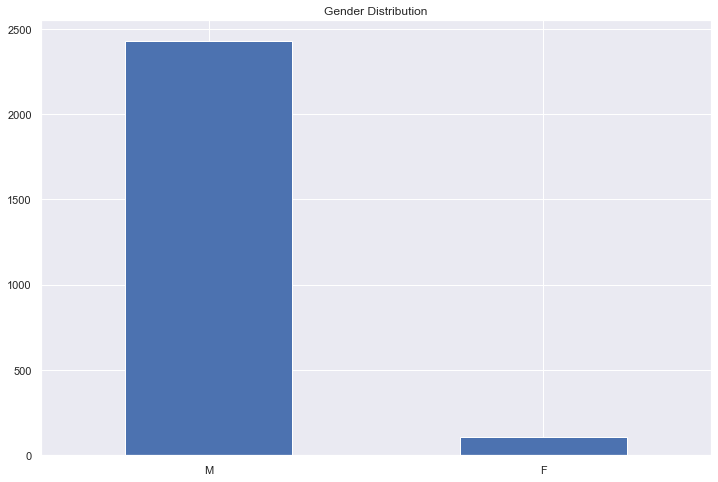

In [52]:
plt.figure(figsize=(12,8))
kill.gender.value_counts().plot(kind="bar", title='Gender Distribution', rot=0);

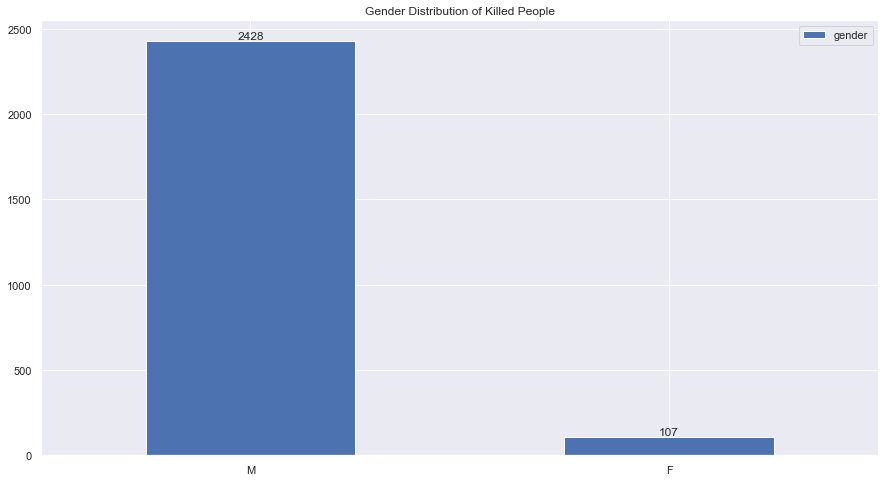

In [60]:
# PANDAS SOLUTION

ax = kill.gender.value_counts().plot(kind="bar", rot=0, figsize=(15,8), legend = True, title="Gender Distribution of Killed People")
ax.bar_label(ax.containers[0], label_type="edge");

# İlk satırdaki kodlarla barplot çizdiriyor, ikinci satırla da barların üstüne rakamlar yazdırılıyor.


# ALTERNATIVE SOLUTION:

# plt.figure(figsize=(10,5))

# ax = kill["gender"].value_counts().plot(kind="bar")
# for i in range(len(ax.containers)):
#     ax.bar_label(container=ax.containers[i], label_type="edge", padding=0.2)

In [61]:
# plt.figure(figsize=(10,5))

# ax = sns.barplot(data=kill, x="gender", y="age", hue="body_camera", ci=False)

# for i in range(len(ax.containers)):
#     ax.bar_label(container=ax.containers[i], label_type="edge", padding=0.5)

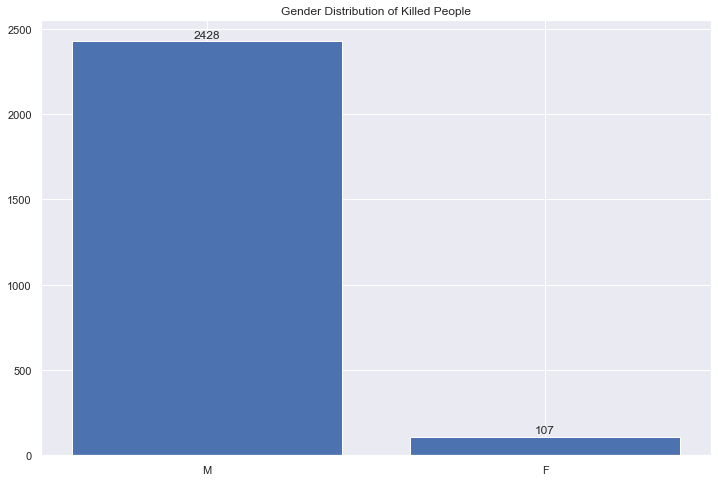

In [62]:
# MATPLOTLIB FUNCTIONAL METHOD:

knum=kill.gender.value_counts()
kgen=kill.gender.unique()
plt.bar(kgen, knum)
plt.title("Gender Distribution of Killed People")
plt.text(x = 0, y = knum[0] + 20, s = knum[0], ha = "center")
plt.text(x = 1, y = knum[1] + 20, s = knum[1], ha = "center")
plt.show()

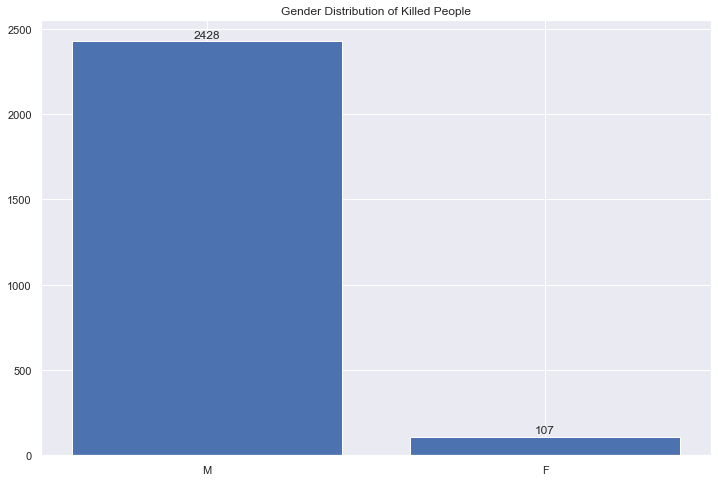

In [63]:
# MATPLOTLIB OBJECT ORIENTED METHOD:

fig, ax = plt.subplots()
data = pd.DataFrame(kill["gender"].value_counts()).reset_index()
ax.bar(data=data,x="index",height="gender")
plt.text(x = 0, y = knum[0] + 20, s = knum[0], ha = "center")
plt.text(x = 1, y = knum[1] + 20, s = knum[1], ha = "center")
ax.set_title("Gender Distribution of Killed People");

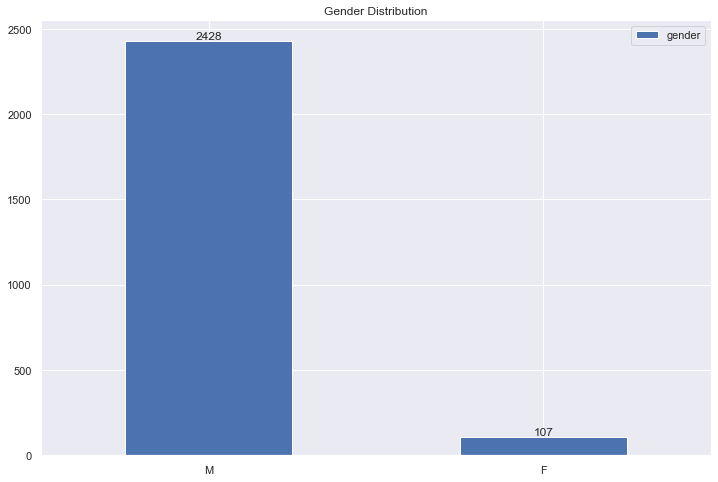

In [55]:
ax = pd.DataFrame(kill.gender.value_counts()).plot(kind="bar", title='Gender Distribution', rot=0)
ax.bar_label(ax.containers[0], label_type="edge");

## 2: Plot 7 most common kill weapons

In [66]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [67]:
kill.armed.value_counts().head(7)

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [68]:
common_weapons = kill.armed.value_counts()[:7]
common_weapons

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [69]:
common_weapons = pd.DataFrame(common_weapons.reset_index())
common_weapons

,index,armed
0,gun,1398
1,knife,373
2,vehicle,177
3,unarmed,171
4,undetermined,117
5,toy weapon,104
6,machete,18


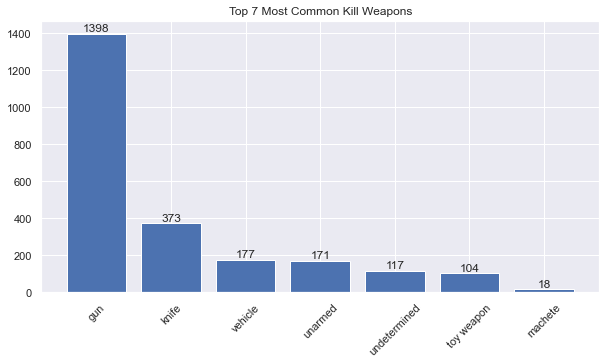

In [70]:
# MATPLOTLIB OOP METHOD

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=common_weapons,x="index",height="armed")
ax.bar_label(ax.containers[0], label_type="edge")
plt.xticks(rotation=45);

ax.set_title("Top 7 Most Common Kill Weapons");

## 3: Plot number of age of killed people under three groups : Under 25 and Above 25, others

In [71]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [72]:
kill.age.value_counts().sort_values().tail()

29.0     83
24.0     83
31.0     85
36.0     91
25.0    103
Name: age, dtype: int64

In [73]:
kill["age"].apply(lambda x: "above25" if x>=25 else  "below25" if x<25 else "other").value_counts()

above25    2008
below25     450
other        77
Name: age, dtype: int64

In [74]:
# kill["age_cat2"]=kill["age"].apply(lambda x: "between50_80" if x>=50 else "betwen40_50" if x>40 & x<50 else "above30" if x>30else  "above20" if x>20else  "below20" if x<20 else "other")
# # kill.age_cat2.value_counts()

In [75]:
kill["age_cat"]=kill["age"].apply(lambda x: "above25" if x>=25 else "below25" if x<25 else "other")
kill.age_cat.value_counts()

above25    2008
below25     450
other        77
Name: age_cat, dtype: int64

In [76]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [77]:
age_class = kill.age_cat.value_counts()
print(age_class.index)
age_class.values

Index(['above25', 'below25', 'other'], dtype='object')


array([2008,  450,   77], dtype=int64)

[Text(0, 0, '2008'), Text(0, 0, '450'), Text(0, 0, '77')]

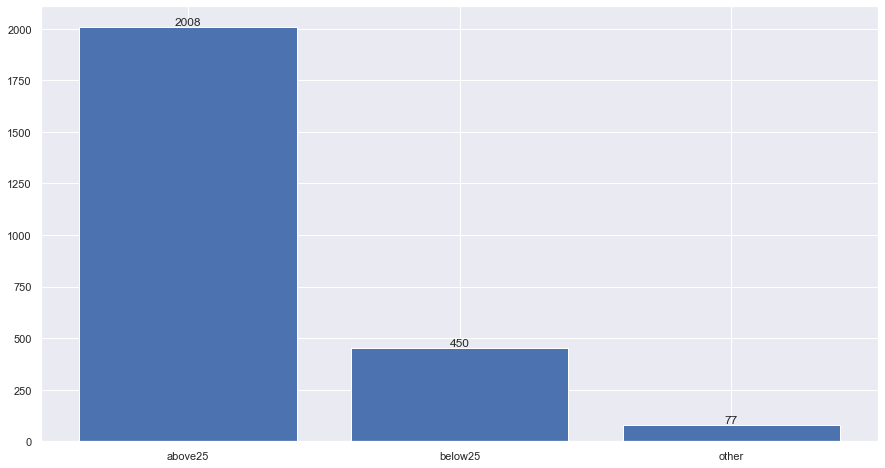

In [79]:
# with matplotlib
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x=age_class.index, height=age_class.values)
ax.bar_label(ax.containers[0], label_type="edge")

## 4: Plot number of killed poeple by race

In [80]:
race_freq = kill.race.value_counts()
race_freq

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

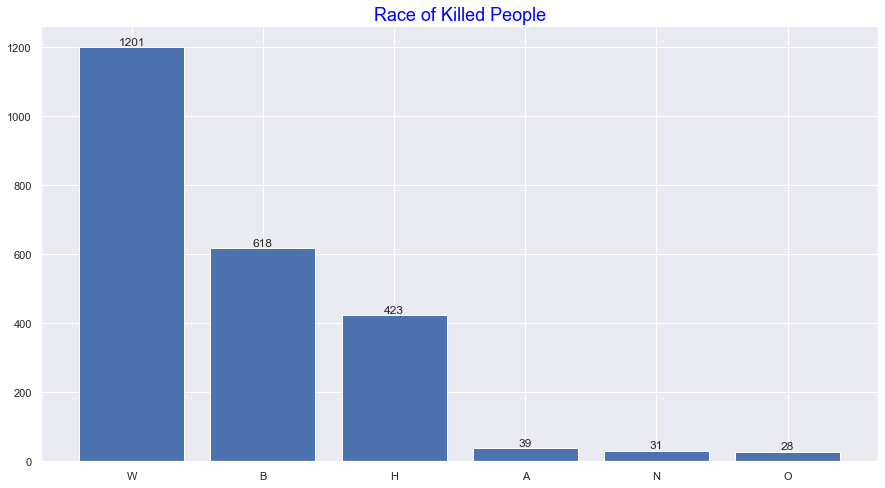

In [82]:
# with MATPLOTLIB Object Oriented Method
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x=race_freq.index, height=race_freq.values)
ax.bar_label(ax.containers[0], label_type="edge")
ax.set_title("Race of Killed People", color="blue", fontsize=18);

## 5: Killed People According to Races (Pie Chart)

In [83]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [84]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [85]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [86]:
kill["race2"] = kill.race.dropna(inplace=True)
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [88]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [87]:
kill.shape

(2535, 16)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [89]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

In [90]:
labels=kill.race.value_counts().index
labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [93]:
sizes=kill.race.value_counts().values
sizes

array([1201,  618,  423,   39,   31,   28], dtype=int64)

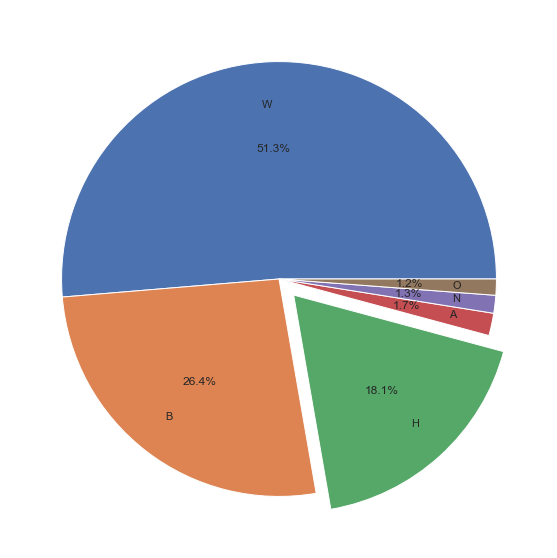

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
plt.pie(labels=labels,
        x=sizes,
       labeldistance=0.8,
       explode=[0,0,0.1,0,0,0],
       autopct='%.1f%%');

**written by alibey**